In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
sys.path.append("/Users/chernals/cernbox/Work/packages")
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import georges
PATH = "/Users/chernals/Dropbox/IBA/Work/IBA-Optics/beamlines"

### Defining a default context
brho = georges.physics.momentum_to_brho(georges.physics.energy_to_momentum(177.5))
context = {
        'PARTICLE': 'PROTON',
        'PC': georges.physics.energy_to_momentum(177.5),
        'BETAX'   : 0.0846155,
        'BETAY'   : 0.0846155,
        'ALPHAX': 0.0,
        'ALPHAY': 0.0,
        'DELTAP': 0.0,
        'DPP': 0.5e-2,
        'MOMENTUM_SLITS_OPENING' : 1.015,
        'DIVERGENCE_SLITS_OPENING_X' : 1.015,
        'DIVERGENCE_SLITS_OPENING_Y' : 1.015,
        'N_TRACKING': 5000,
        'EMITX': 14.3e-6,
        'EMITY': 14.3e-6,
    }

In [41]:
#bdsim = georges.bdsim.BDSim(bdsim='/Users/chernals/bdsim-build/bdsim', path=PATH)
bl = georges.Beamline(['ess'], survey=True, path=PATH, prefix='generic', elements='elements')
georges.madx.survey(line=bl, context=context)
bl_twiss = georges.madx.twiss(line=bl, context=context)
b = georges.Beam(energy=200).from_5d_multigaussian_distribution(5,
                                                   XRMS=0.01,
                                                   PXRMS=0.001,
                                                   YRMS=0.01,
                                                   PYRMS=0.001,
                                                   DPPRMS=0.00)
georges.madx.track(line=bl, context=context, beam=b)

S
21.505732    <georges.beam.Beam object at 0x1100a04e0>
dtype: object


In [43]:
bdsim.attach(bl_survey)
bdsim.run({})
#bdsim.print_input()

NameError: name 'bdsim' is not defined

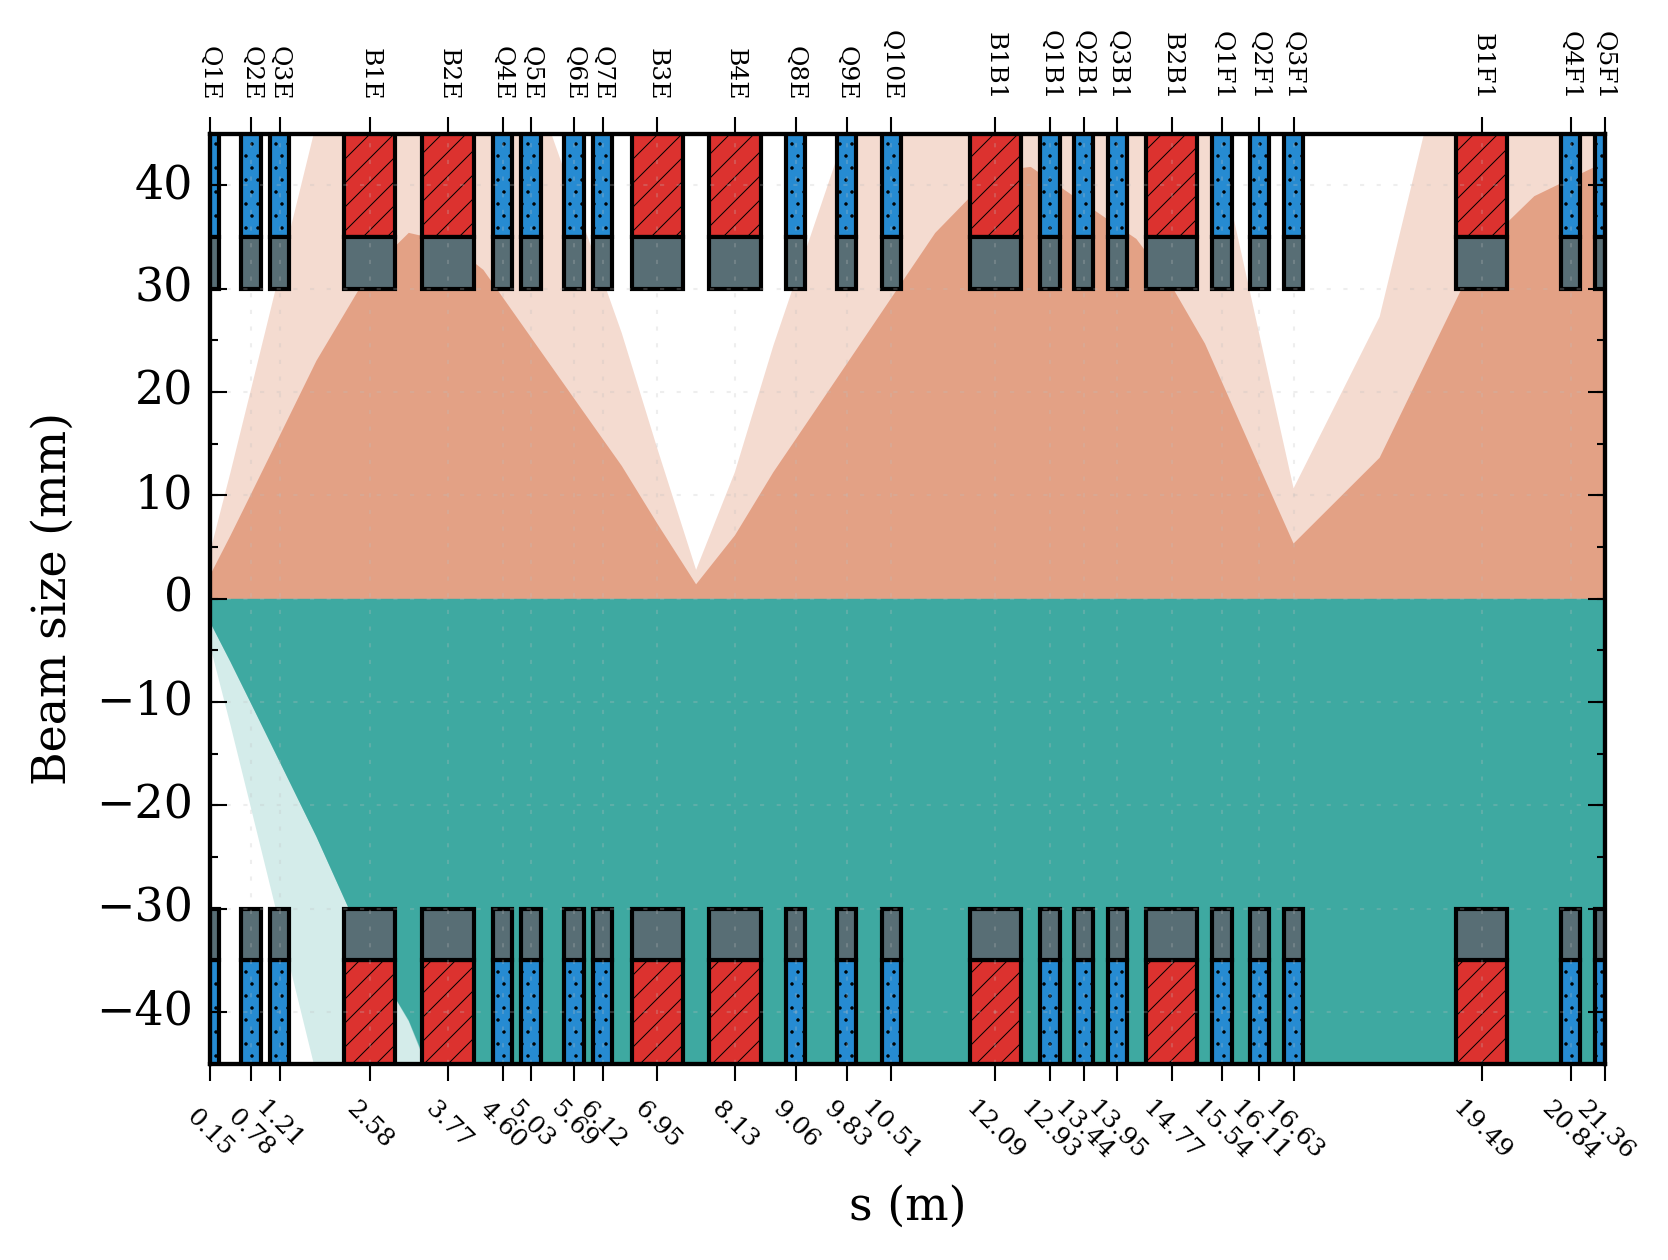

In [42]:
from georges.plotting import *
with plt.style.context('word'):
    fig = plt.figure(1)

    ax1 = fig.add_subplot(111)
    prepare(ax1, bl)
    aperture(ax1, bl)
    twiss(ax1, bl_twiss, context)
    #track(ax1, bl, b)

In [141]:
import numpy as np
data = pd.read_csv("/Users/chernals/Ranges.csv", index_col='range')
ranges = pd.Series(pd.to_numeric(data.columns))
data.index
#ranges = data.columns.is_monotonic_decreasing
#ranges

Index(['DEGRADER', 'GROUP3', 'Q1E', 'Q2E', 'Q3E', 'Q47E', 'Q56E', 'Q8E', 'Q9E',
       'Q10E', 'Q1B1', 'Q2B1', 'Q3B1', 'Q1F1', 'Q2F1', 'B1234E', 'B12B1',
       'TRB34E', 'T2E', 'TRB2B1', 'T1F1', 'B1F1', 'Q3F1', 'Q4F1', 'SL1E',
       'SL2E', 'SL3E'],
      dtype='object', name='range')

'D'

In [150]:
data.query("index=='GROUP3'").interpolate()#.values

,32.54,31.5,30.5,29.5,28.5,27.5,26.5,25.5,24.5,23.5,...,15.5,14.5,13.5,12.5,11.5,10.5,9.5,8.5,7.72,4.1
range,,,,,,,,,,,,,,,,,,,,,
GROUP3,1.58967,1.57222,1.55514,1.53777,1.52007,1.50204,1.48364,1.46486,1.44566,1.42602,...,1.24788,1.22206,1.19514,1.16697,1.13737,1.10613,1.07297,1.03751,1.00795,0.837952


In [152]:
import subprocess as sub
p = sub.Popen(["/Users/chernals/bdsim-build/bdsim --file=/Users/chernals/Desktop/bdsim.gmad"],
                      
                      shell=True
                      )

In [154]:
from subprocess import call
call(["/Users/chernals/bdsim-build/bdsim", "--file=/Users/chernals/Desktop/bdsim.gmad"])

1